# CARS.csv Data Demonstration

In [82]:
#Import Libraries
import pandas as pd
import sys
from os import listdir
import re
from collections import Counter
import matplotlib.pyplot as plt
from googlesearch import search
from matplotlib.figure import Figure
import numpy as np
import webbrowser

In [2]:
#Upload CSV File
rawdf = pd.read_csv('cars.csv')

# Fix seats from float to int64
rawdf['seats'] = rawdf['seats'].astype('Int64')

## Exploratory Data Analysis

### Summary

In [88]:
print("rows:",rawdf.shape[0])
print("field:",rawdf.shape[1])
rawdf.head(20)

rows: 8128
columns: 15


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,make,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Maruti,Swift VXI BSIII
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5,Hyundai,Xcent 1.2 VTVT E Plus
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5,Maruti,Wagon R LXI DUO BSIII
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4,Maruti,800 DX BSII
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5,Toyota,Etios VXD
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5,Ford,Figo Diesel Celebration Edition


### Replace Name Field with Make and Model Fields

In [90]:
make,model = [],[]    
for values in rawdf['name']:
    make.append(re.search(r"([a-zA-Z0-9\-]*)[' ']([a-zA-Z0-9\-\.\(\) ]*)", values).group(1))
    model.append(re.search(r"([a-zA-Z0-9\-]*)[' ']([a-zA-Z0-9\-\.\(\) ]*)", values).group(2))

rawdf['make'],rawdf['model'] = make,model

rawdf.drop(['name'],axis=1)

cols = rawdf.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = rawdf[cols]

df.head(10)

,make,model,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,Swift Dzire VDI,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda,Rapid 1.5 TDI Ambition,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,City 2017-2020 EXi,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,i20 Sportz Diesel,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,Swift VXI BSIII,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5
5,Hyundai,Xcent 1.2 VTVT E Plus,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5
6,Maruti,Wagon R LXI DUO BSIII,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5
7,Maruti,800 DX BSII,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4
8,Toyota,Etios VXD,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5
9,Ford,Figo Diesel Celebration Edition,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5


### Count Nulls

In [16]:
print(df.isna().sum())

make               0
model              0
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


### Count of Unique Values Per Field

In [17]:
print(df.nunique(),"\n\n")

make               32
model            2058
name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64 




### List Unique Values for Fields with <100 Uniques (Ordered by Counts)

In [6]:
for (colname,coldata) in df.iteritems():
    if len(coldata.unique()) < 100:
        print(colname.upper()+"  /  COUNT")
        print(df[colname].value_counts())            
        print("\n","-"*100,"\n")

MAKE  /  COUNT
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Opel                1
Ashok               1
Peugeot             1
Name: make, dtype: int64

 ---------------------------------------------------------------------------------------------------- 

YEAR  /  COUNT
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009  

### Assorted Plots

#### Make - Bar Plot

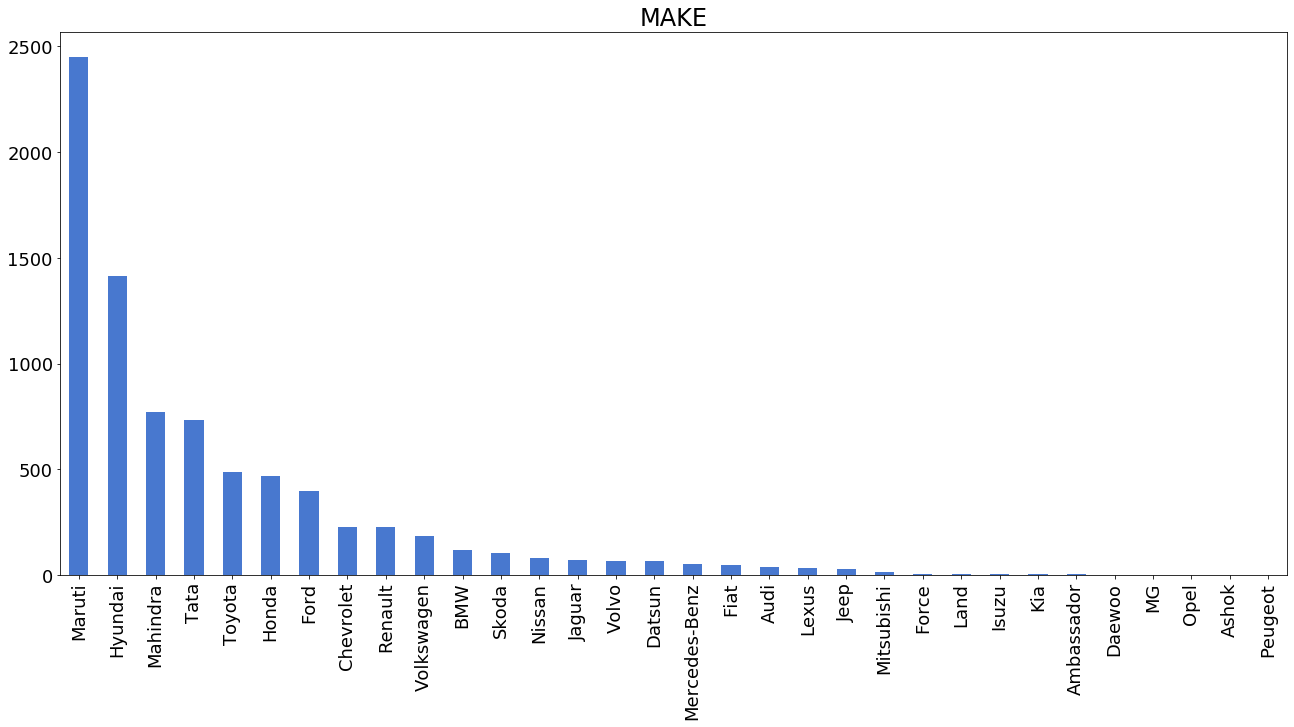

In [92]:
colname = 'make'
df[colname].value_counts().plot(kind='bar')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = [22, 6]
plt.rc('font', size=18) 
plt.title(label = colname.upper(),fontdict={'fontsize': 24})
plt.show()

#### Seats - Bar Plot

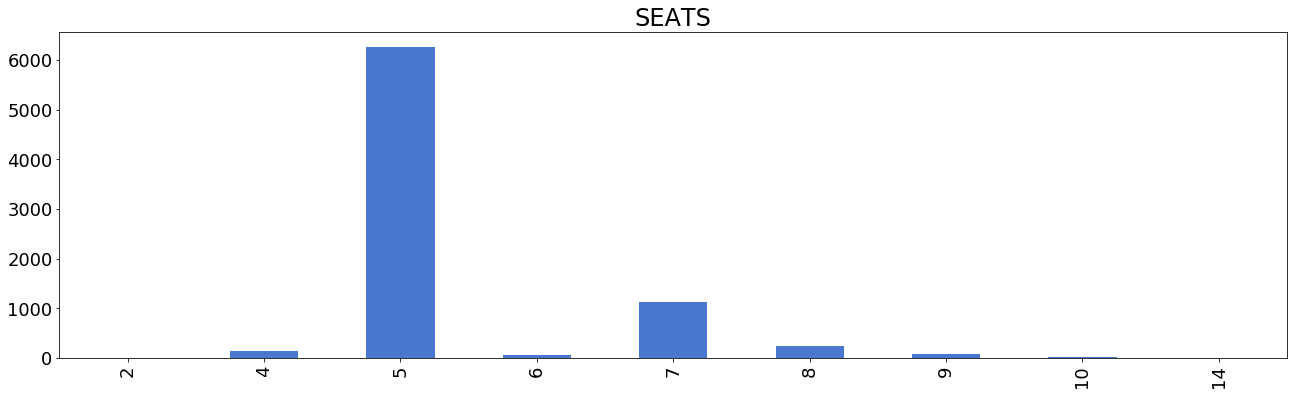

In [93]:
colname = 'seats'
df[colname].value_counts().sort_index().plot(kind='bar')
plt.rcParams['figure.figsize'] = [22, 10]
plt.title(label = colname.upper(),fontdict={'fontsize': 24})
plt.show()

#### Selling Price - Histogram

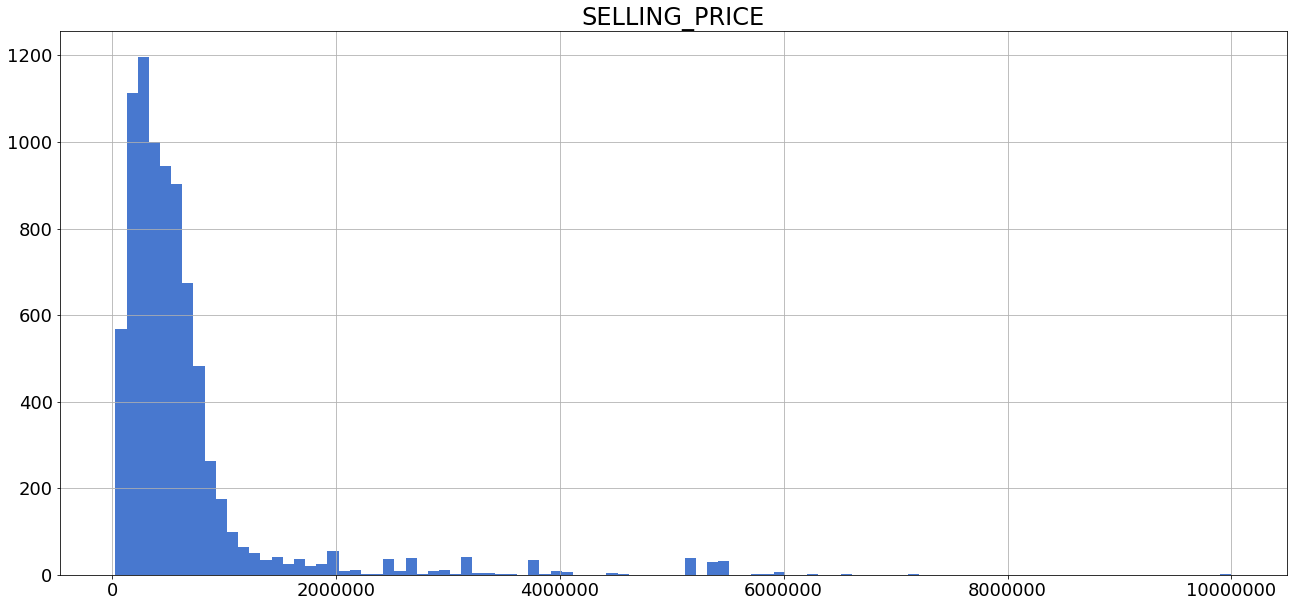

In [94]:
colname = 'selling_price'
df.hist(column= colname,bins=100)
plt.rcParams['figure.figsize'] = [22, 10]
plt.title(label = colname.upper(),fontdict={'fontsize': 24})
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,max(df['selling_price'])))
plt.show()

#### KM Driven - Histogram

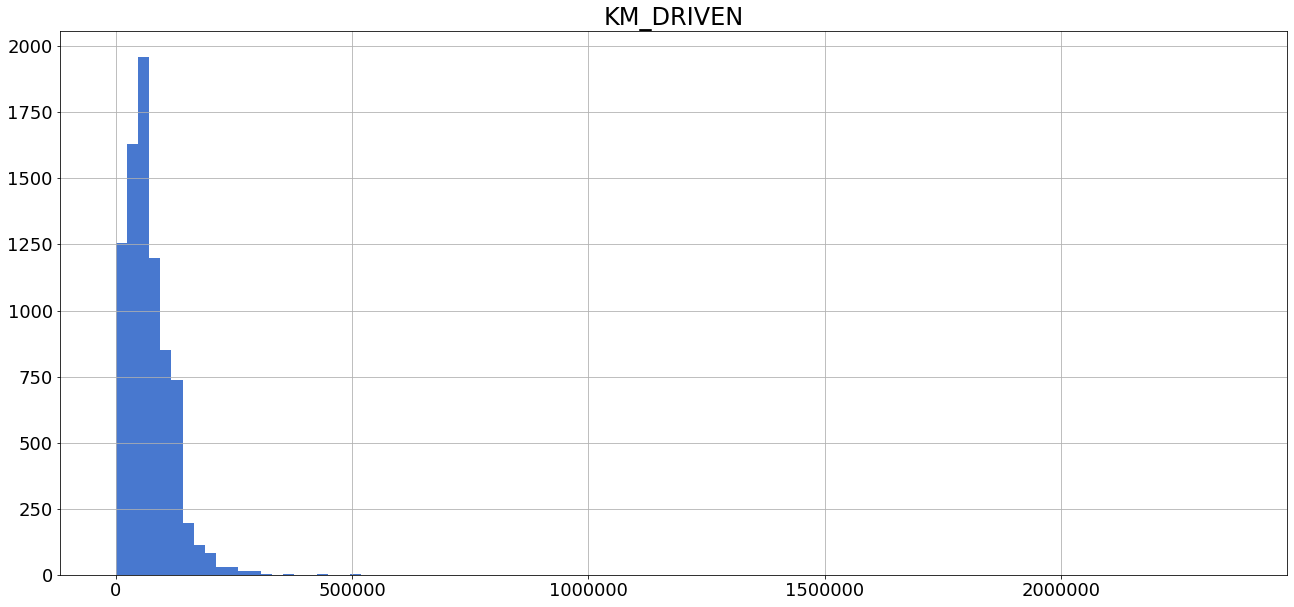

In [95]:
colname = 'km_driven'
df.hist(column= colname,bins=100)
plt.rcParams['figure.figsize'] = [22, 10]
plt.title(label = colname.upper(),fontdict={'fontsize': 24})
plt.show()

#### Year - Histogram

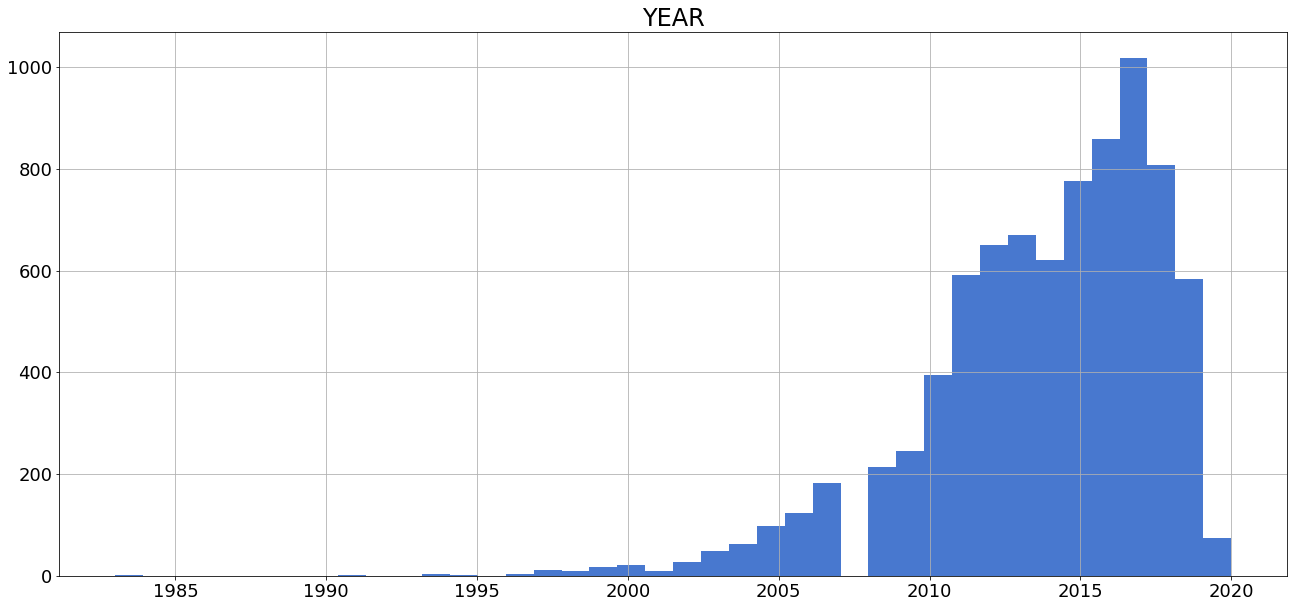

In [96]:
colname = 'year'
df.hist(column= colname,bins=40)
plt.rcParams['figure.figsize'] = [22, 10]
plt.title(label = colname.upper(),fontdict={'fontsize': 24})
plt.show()

#vals = df[df['server'].isin([1,3])].groupby(['court'])['speed'].mean().to_frame()

### Averages of numeric fields by Make

In [99]:
averages_df = df.groupby(['make']).mean().round(2)
averages_df

,km_driven,seats,selling_price,year
make,,,,
Ambassador,82500.00,5.00,124000.00,2002.50
Ashok,200000.00,8.00,300000.00,2013.00
Audi,53896.55,5.30,2612199.92,2015.22
BMW,30269.46,4.94,4109916.67,2016.71
Chevrolet,79785.37,5.77,273867.48,2012.15
Daewoo,81317.00,5.00,77000.00,2000.33
Datsun,36342.86,5.43,314599.95,2017.02
Fiat,84630.89,5.00,296063.79,2011.98
Force,55546.50,6.33,887500.00,2017.33


### Statistical Summary for Numeric Fields

In [101]:
df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,year,selling_price,km_driven,seats
count,8128,8128,8128,7907
mean,2014,638272,69820,5
std,4,806253,56551,1
min,1983,29999,1,2
25%,2011,254999,35000,5
50%,2015,450000,60000,5
75%,2017,675000,98000,5
max,2020,10000000,2360457,14


## Seating Capacity Analysis

### List of Cars with Exceptional Seat Capacity (cars with more than eight seats)

In [102]:
pd.set_option('display.max_rows', None)
hi_seats = rawdf[rawdf["seats"] > 8].filter(items=['name', 'seats']).sort_values('seats', ascending=False)
hi_seats = hi_seats.drop_duplicates()
print("rows:",hi_seats.shape[0])
print("columns:",hi_seats.shape[1])
print(hi_seats)

rows: 41
columns: 2
                                                   name  seats
4575            Tata Winger Deluxe - Flat Roof (Non-AC)     14
4112                             Tata Sumo SE Plus BSII     10
3794               Chevrolet Tavera LS B3 10 Seats BSII     10
6219        Chevrolet Tavera Neo LS B3 - 10 seats BSIII     10
2086                        Tata Sumo EX 10/7 Str BSIII     10
5712                  Chevrolet Tavera B1-10 seats BSII     10
3283           Chevrolet Tavera Neo 3 LS 10 Seats BSIII     10
6853              Chevrolet Tavera Neo 3 10 Seats BSIII     10
5165                     Tata Spacio Gold-10/6 Str BSII     10
3714           Chevrolet Tavera B3 LT L1 10 Seats BSIII     10
4998                                Toyota Qualis FS B3     10
604                            Tata Sumo CX 10 Str BSIV     10
795                    Chevrolet Tavera Neo 3 LS 10 Str     10
4971                              Tata Sumo CX 9 Seater      9
5869                           Mahi

### Google searches for largest seating vehicles (Top 5 cars, top 3 Google results)

In [103]:
for car in hi_seats['name'][:5]:
    print(car.upper())
    for j in search(car, tld="co.in", stop=3):
        print(j)
    print("\n")

TATA WINGER DELUXE - FLAT ROOF (NON-AC)
http://www.sagmart.com/car/Tata-Winger-Deluxe-Flat-Roof-Non-AC/
https://www.fuelarc.com/commercial-vehicles/tata-motors/winger-deluxe-flat-roof-non-ac/
https://www.motorbazee.com/tata+winger+deluxe-long-wb-flat-roof-non-ac-(13-1)-bs-iii-overview


TATA SUMO SE PLUS BSII
https://www.cardekho.com/overview/Tata_Sumo_Victa/Tata_Sumo_Victa_SE_Plus_BSII.htm
https://www.cardekho.com/overview/Tata_Sumo/Tata_Sumo_SE_Plus.htm
https://www.carandbike.com/tata-cars/sumo/se-bs-iii


CHEVROLET TAVERA LS B3 10 SEATS BSII
https://www.cardekho.com/overview/Chevrolet_Tavera_Neo/Chevrolet_Tavera_Neo_LS_B3_-_10_seats_BSII.htm
https://www.carwale.com/chevrolet-cars/tavera/elite-ls-b3-10-seater-bs-iii/
https://www.cartrade.com/chevrolet-cars/tavera/elite-ls-b3-10-seater-bs-iii/


CHEVROLET TAVERA NEO LS B3 - 10 SEATS BSIII
https://www.cardekho.com/overview/Chevrolet_Tavera_Neo/Chevrolet_Tavera_Neo_LS_B3_-_10_seats_BSII.htm
https://www.carwale.com/chevrolet-cars/tavera/

### Open first browser tabs for top three large-seat cars

In [104]:
for car in hi_seats['name'][:3]:
    print(car.upper())
    for site in search(car, tld="co.in", stop=1):
        webbrowser.open(site)

TATA WINGER DELUXE - FLAT ROOF (NON-AC)
TATA SUMO SE PLUS BSII
CHEVROLET TAVERA LS B3 10 SEATS BSII


### Seats Linear Regression

In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression